## Notebook to solve equations of linear acoustics for pressure and velocity perturabtions as a function of time using Godunov's Method

DT =  0.020202020202 dx = 0.020202020202


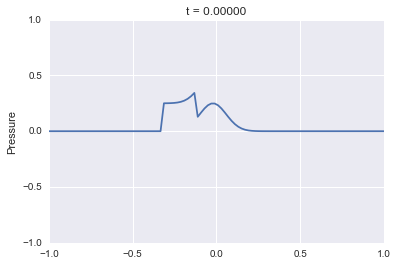

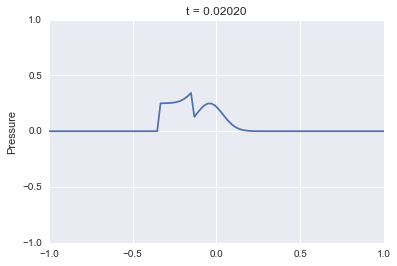

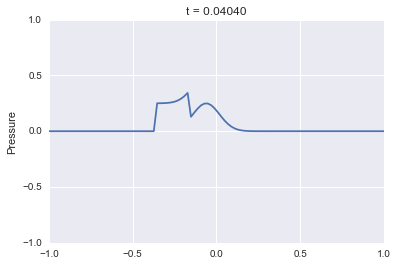

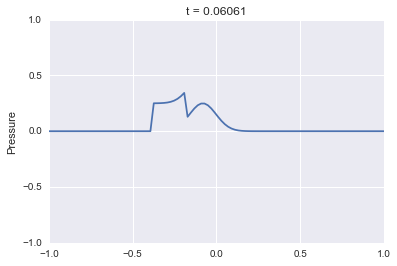

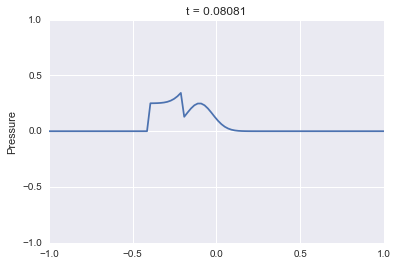

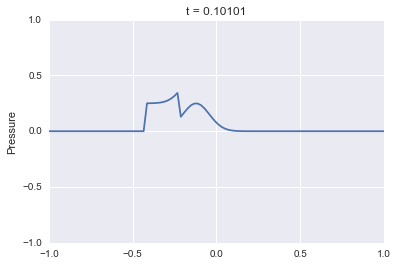

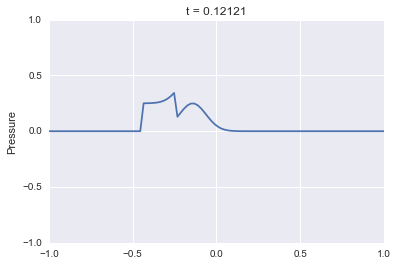

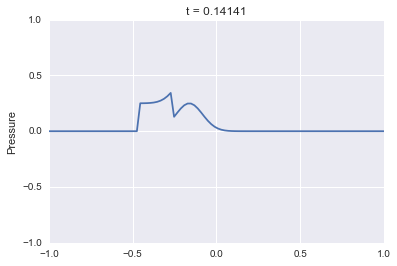

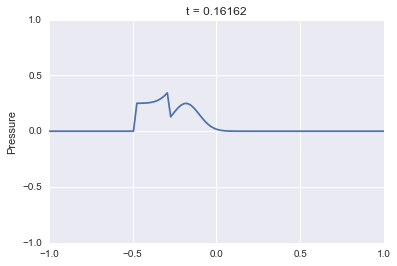

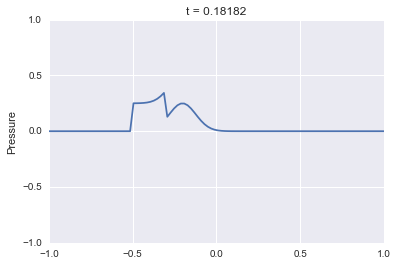

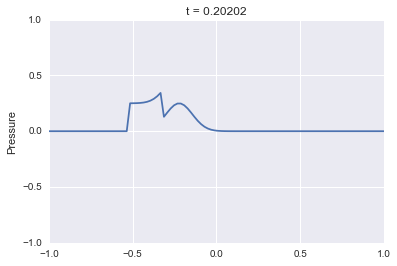

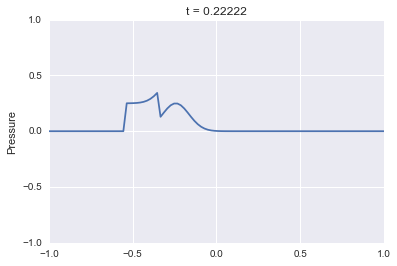

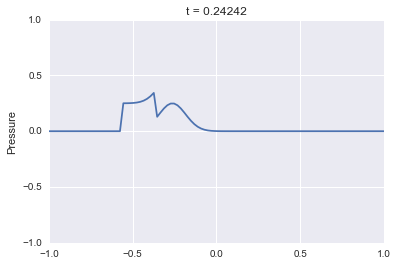

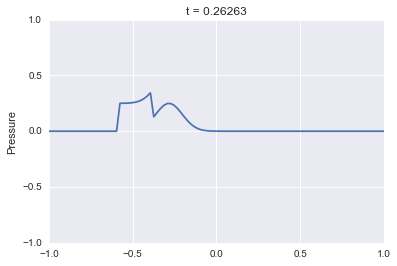

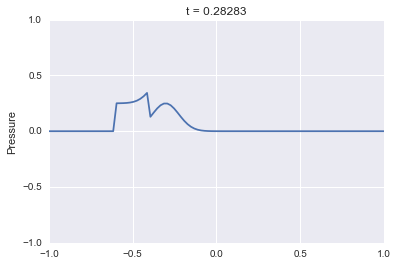

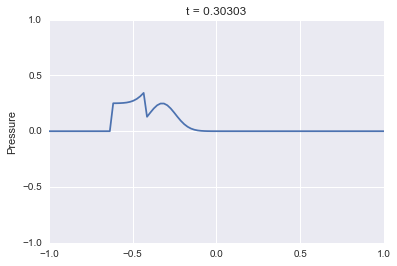

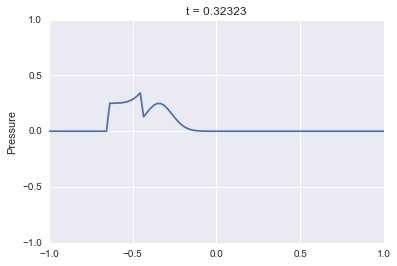

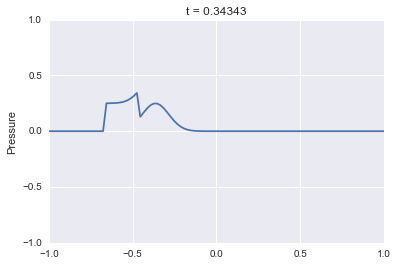

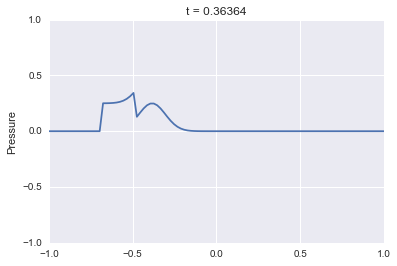

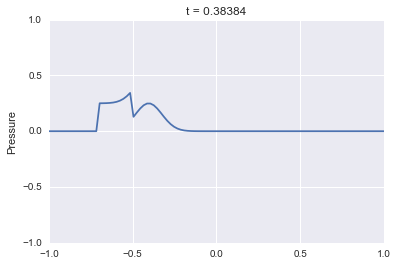

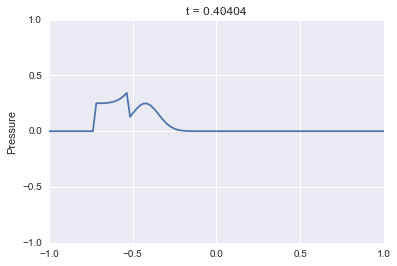

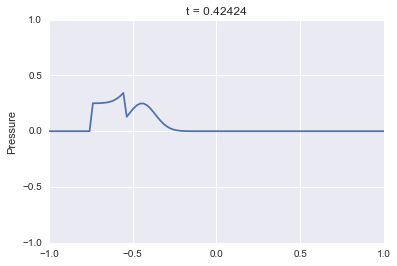

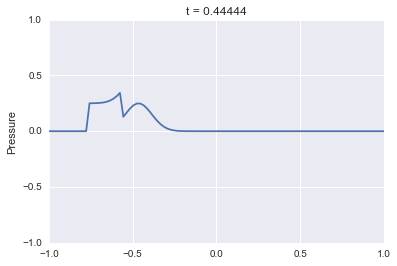

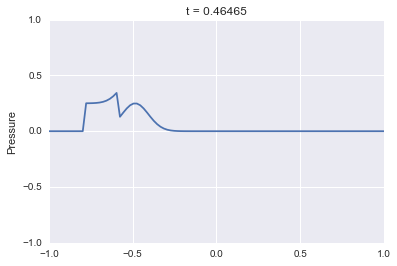

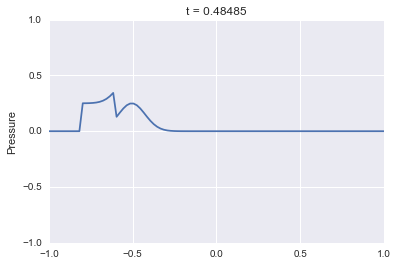

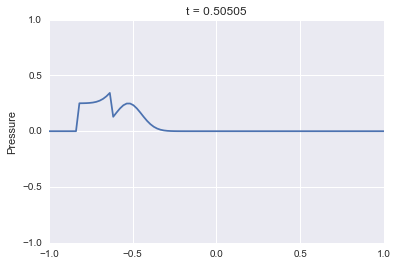

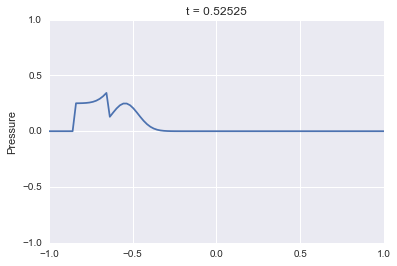

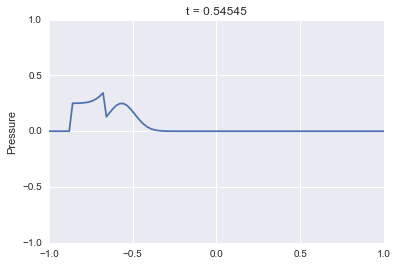

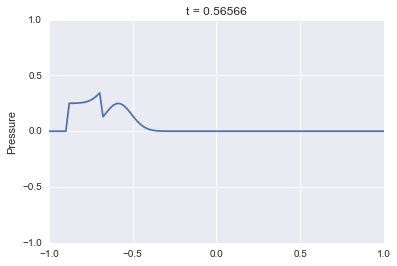

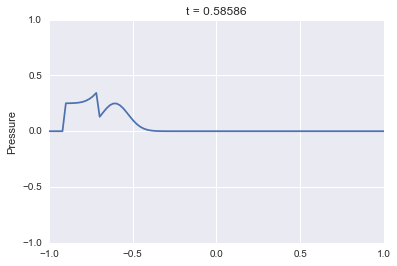

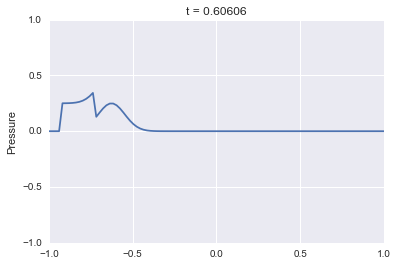

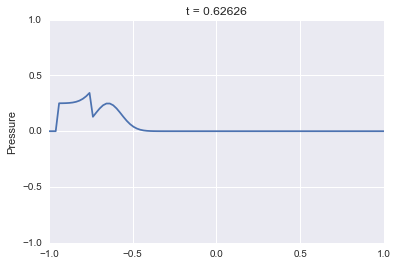

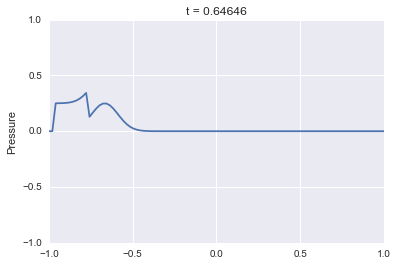

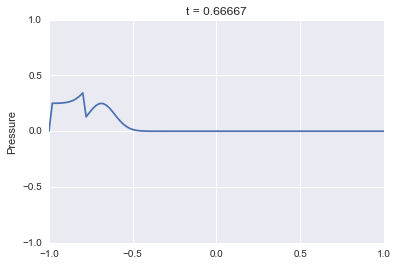

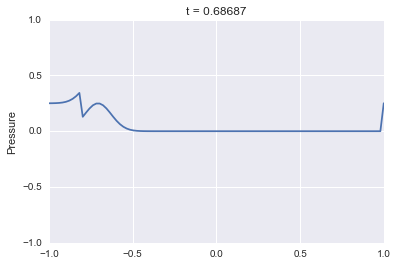

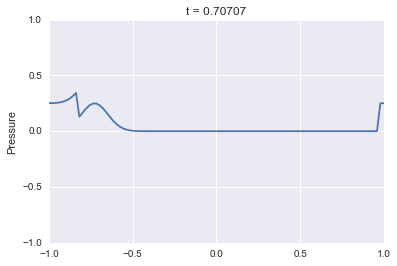

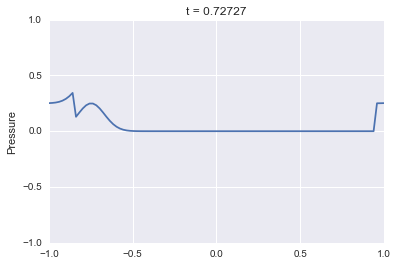

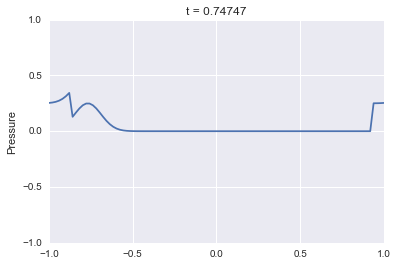

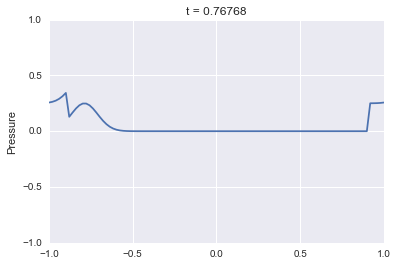

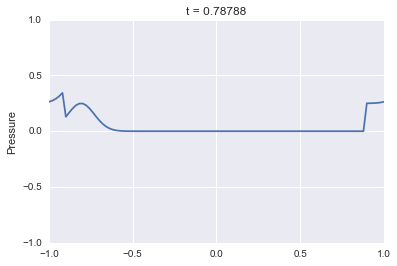

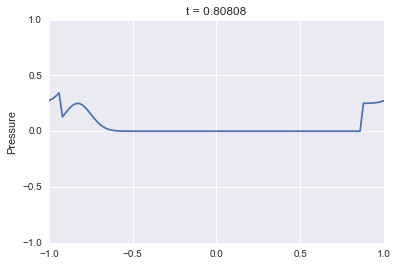

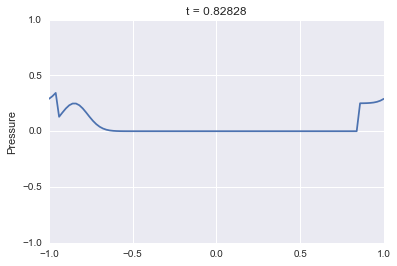

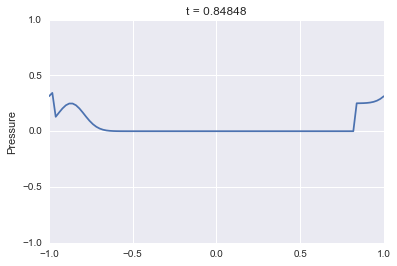

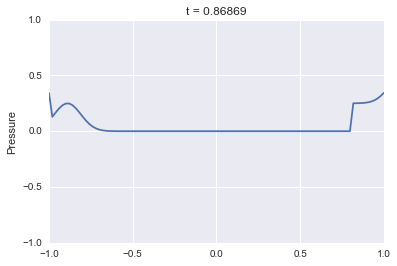

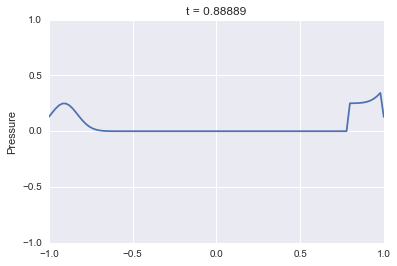

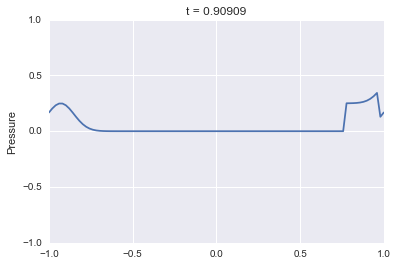

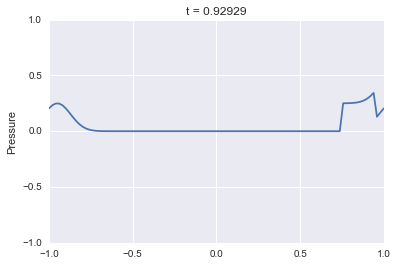

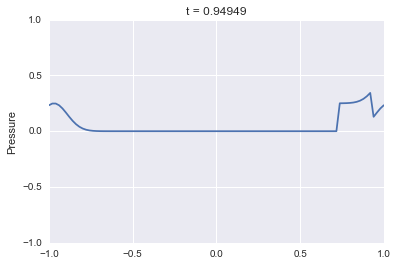

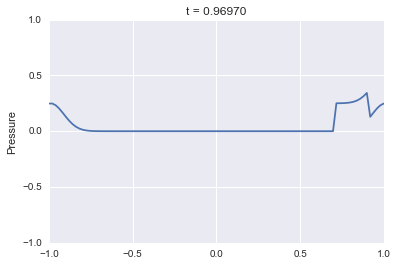

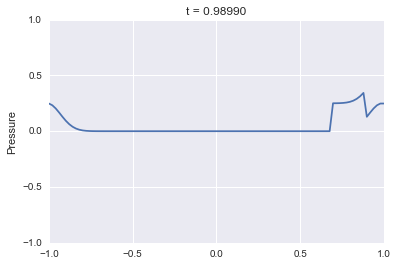

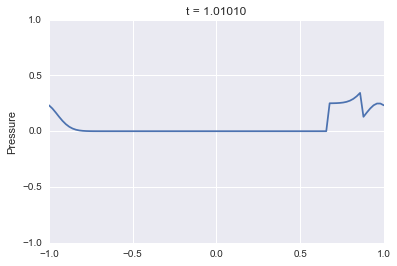

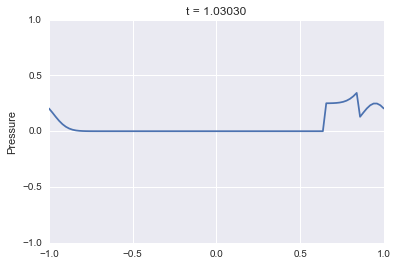

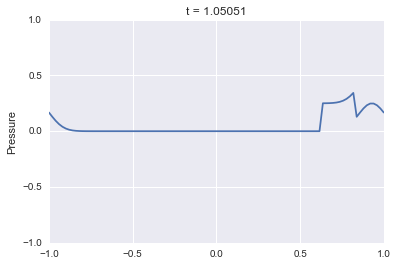

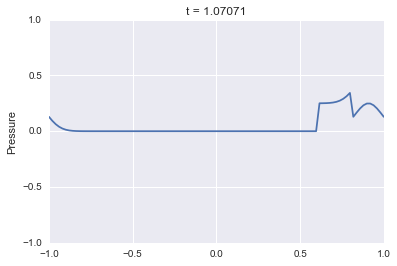

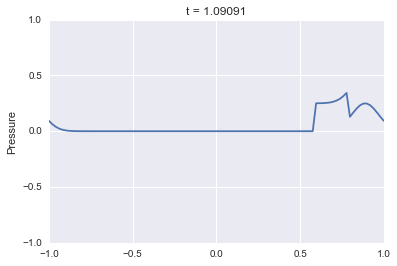

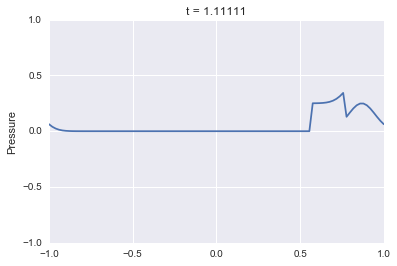

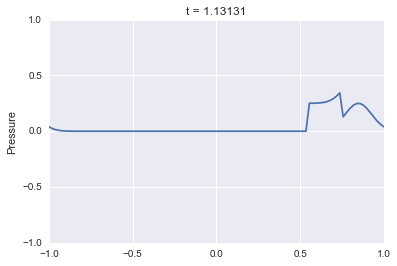

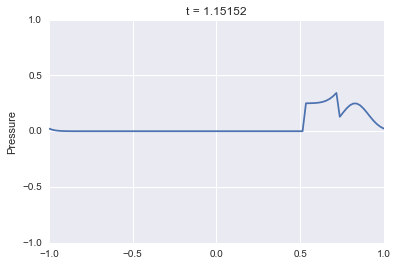

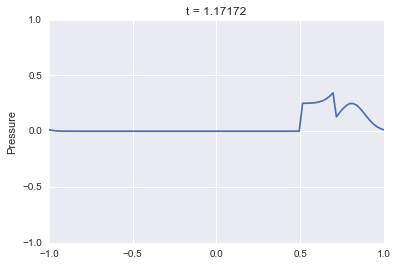

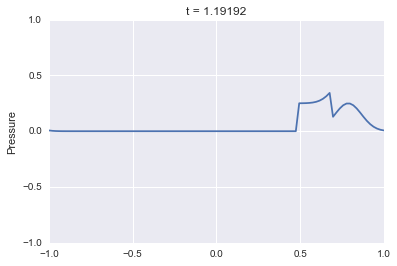

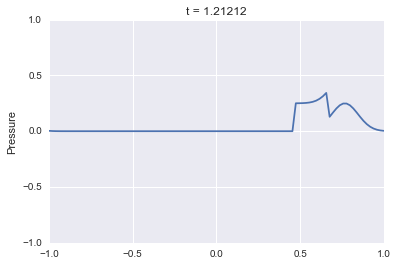

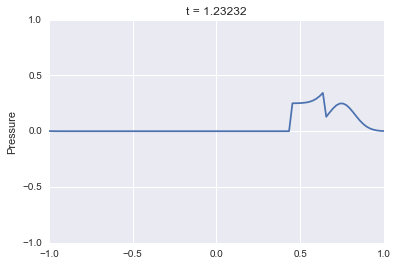

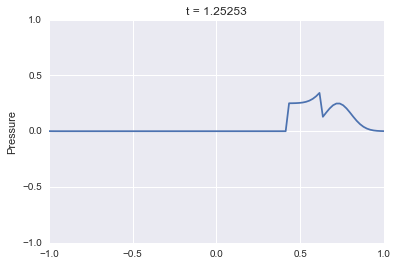

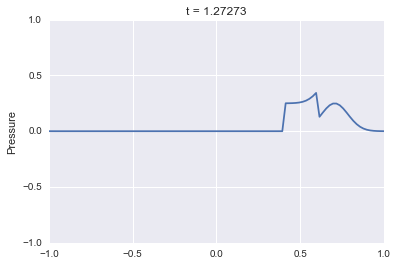

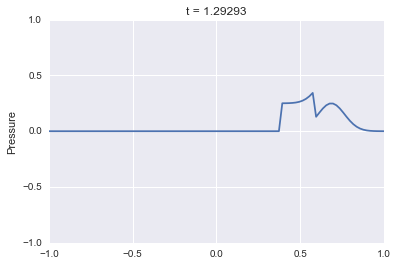

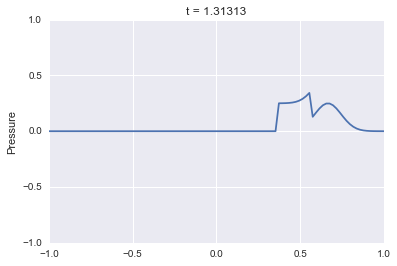

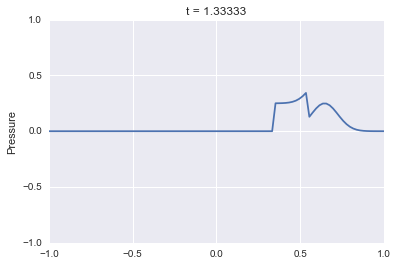

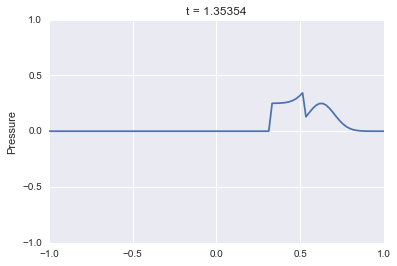

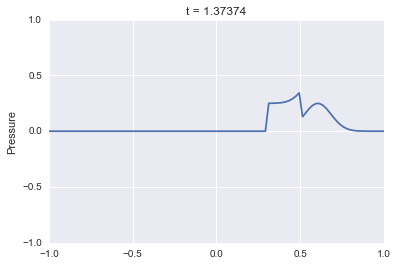

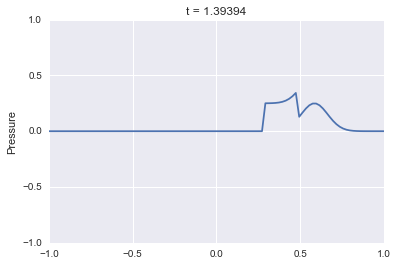

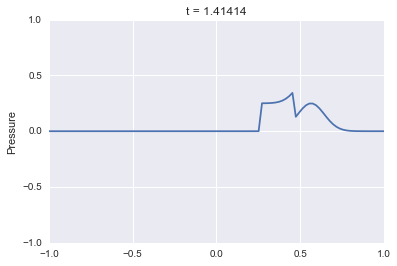

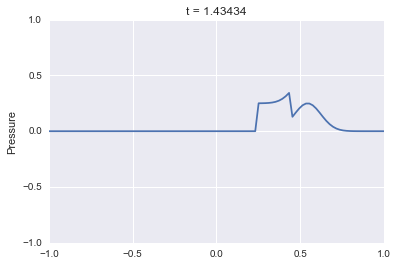

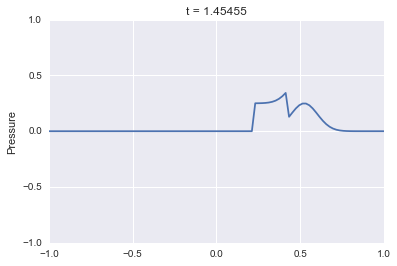

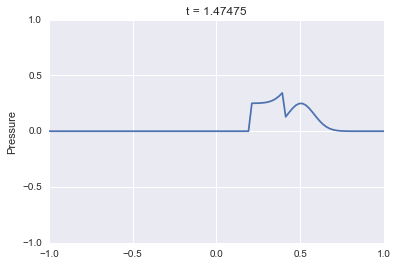

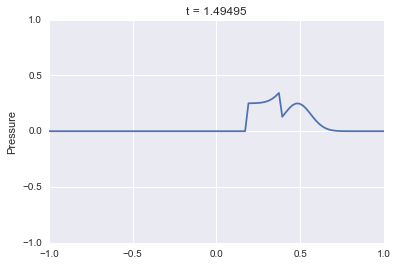

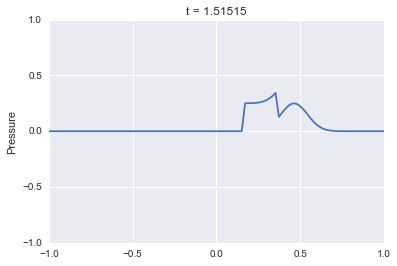

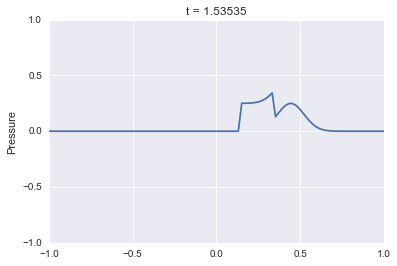

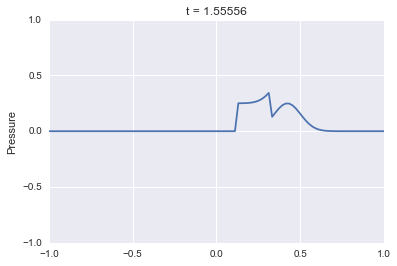

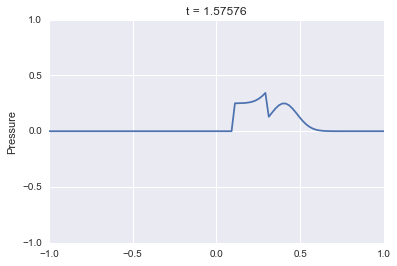

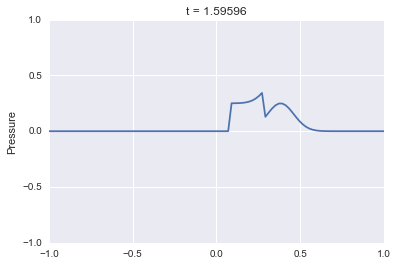

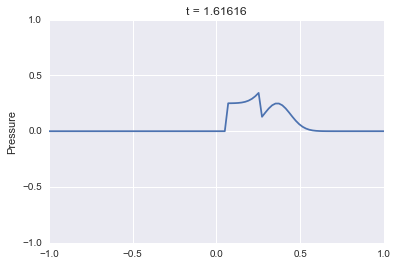

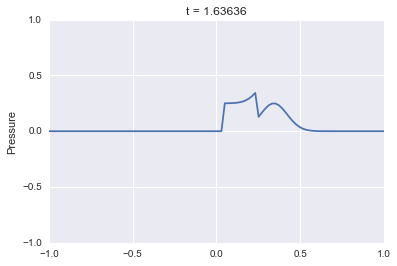

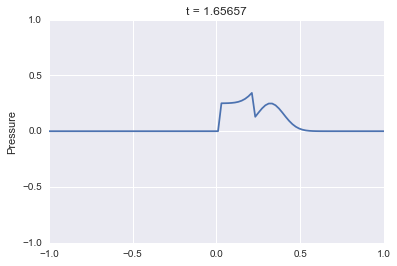

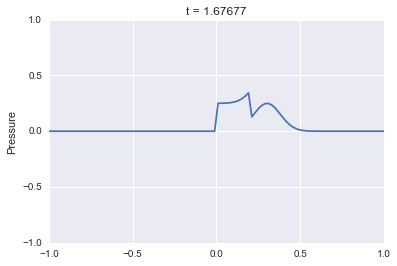

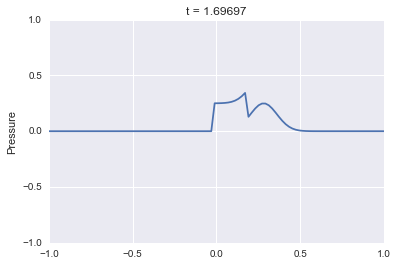

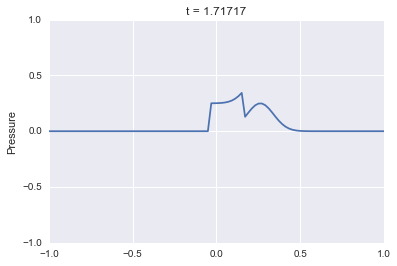

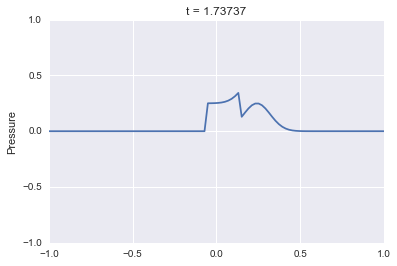

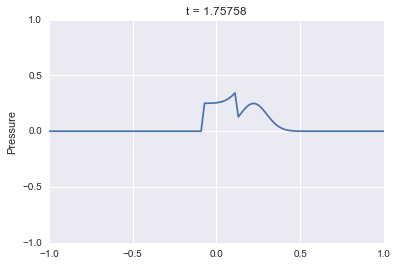

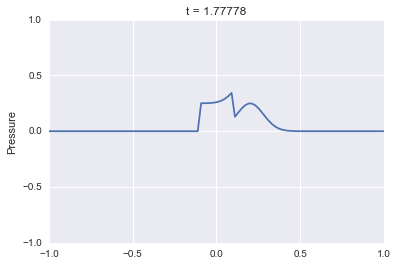

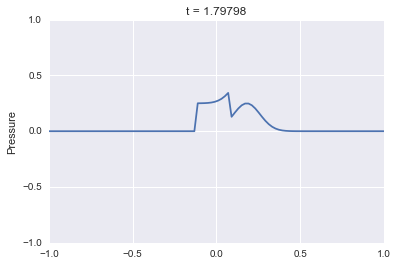

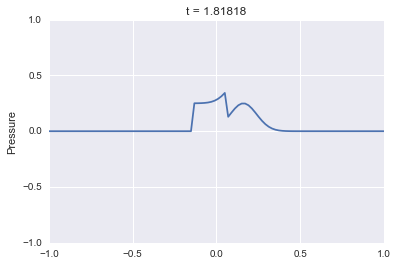

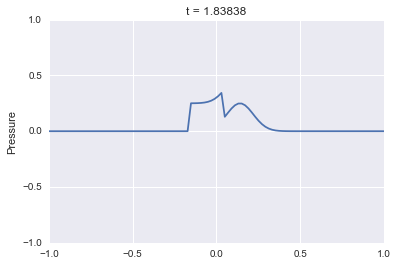

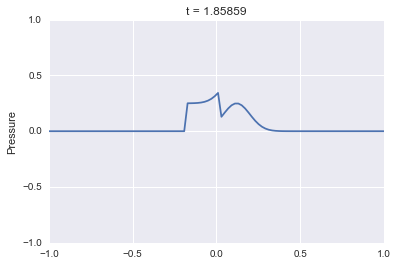

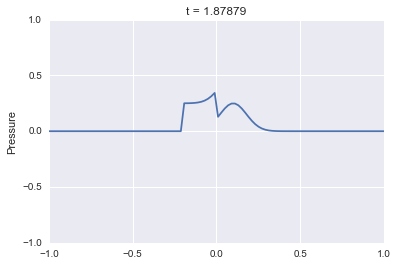

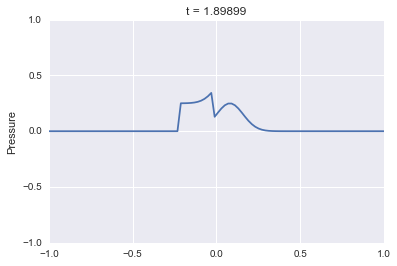

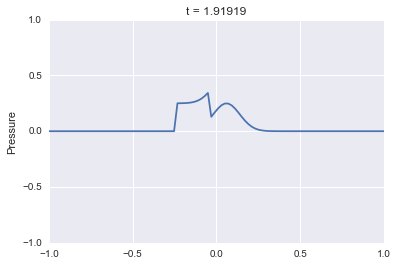

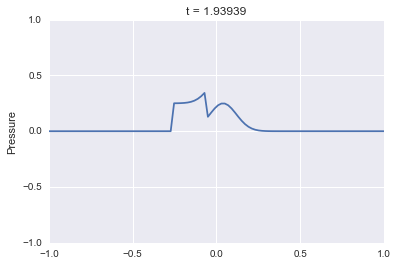

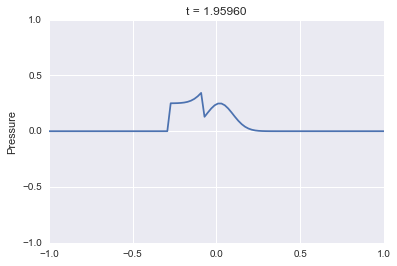

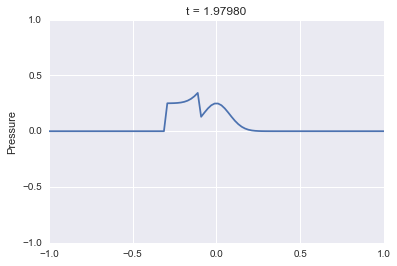

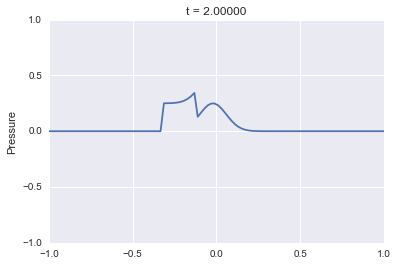

Done


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

rho_0 = 1.225  # density of air (kg/m^3)
c_s = 3.43e2  # sound speed in air (m/s)
rho_0 = 1.
c_s = 1.
Z_0 = rho_0*c_s

N_steps = 100
N_cells = 100
x = np.linspace(-1,1,N_cells)
dx = x[1]-x[0]
CFL = 1.  # Courant Number
dt = CFL*dx/c_s

print 'DT = ',dt,'dx =',dx

p_array = np.zeros(N_cells)
u_array = np.zeros(N_cells)

# Initialize pressure array with some crazy function
for i in range(N_cells):
    if x[i] > -0.3 and x[i] < -0.1:
        p_array[i] = 0.5*np.exp(-80.*x[i]**2) + 0.5
    else:
        p_array[i] = 0.5*np.exp(-80.*x[i]**2)
        

for j in range(N_steps):
    
    for i in range(0,N_cells):
        
        # Use old values to get fluctuations
        if i == 0:
            left_pressure = c_s/(2*Z_0)*(Z_0*(p_array[i]-p_array[N_cells-1])+Z_0**2*(u_array[i]-u_array[N_cells-1]))
            right_pressure = c_s/(2*Z_0)*(-Z_0*(p_array[i+1]-p_array[i])+Z_0**2*(u_array[i+1]-u_array[i]))
            left_velocity = c_s/(2*Z_0)*((p_array[i]-p_array[N_cells-1])+Z_0*(u_array[i]-u_array[N_cells-1]))
            right_velocity = c_s/(2*Z_0)*((p_array[i+1]-p_array[i])-Z_0*(u_array[i+1]-u_array[i]))
        elif i == N_cells-1:
            left_pressure = c_s/(2*Z_0)*(Z_0*(p_array[i]-p_array[i-1])+Z_0**2*(u_array[i]-u_array[i-1]))
            right_pressure = c_s/(2*Z_0)*(-Z_0*(p_array[0]-p_array[i])+Z_0**2*(u_array[0]-u_array[i]))
            left_velocity = c_s/(2*Z_0)*((p_array[i]-p_array[i-1])+Z_0*(u_array[i]-u_array[i-1]))
            right_velocity = c_s/(2*Z_0)*((p_array[0]-p_array[i])-Z_0*(u_array[0]-u_array[i]))
        else:
            left_pressure = c_s/(2*Z_0)*(Z_0*(p_array[i]-p_array[i-1])+Z_0**2*(u_array[i]-u_array[i-1]))
            right_pressure = c_s/(2*Z_0)*(-Z_0*(p_array[i+1]-p_array[i])+Z_0**2*(u_array[i+1]-u_array[i]))
            left_velocity = c_s/(2*Z_0)*((p_array[i]-p_array[i-1])+Z_0*(u_array[i]-u_array[i-1]))
            right_velocity = c_s/(2*Z_0)*((p_array[i+1]-p_array[i])-Z_0*(u_array[i+1]-u_array[i]))
        
        # Use fluctuations to update pressure and velocity
        p_array[i] = p_array[i] - dt/dx*(left_pressure+right_pressure)
        u_array[i] = u_array[i] - dt/dx*(left_velocity+right_velocity)
        
    plt.plot(x,p_array)
    plt.title('t = {:6.5f}'.format(dt*j))
    plt.ylabel('Pressure')
    plt.ylim(-1,1)
    #plt.savefig('/Users/jakehanson/Desktop/plots/pressure_%06d.pdf' % j)
    plt.show()

#     plt.plot(x,u_array)
#     plt.title('t = {:6.5f}'.format(dt*j))
#     plt.ylabel('Velocity')
#     plt.ylim(-1,1)
#     plt.savefig('/Users/jakehanson/Desktop/plots/velocity_%06d.pdf' % j)
#     plt.show()

print 'Done'